In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]



A = imread('dog.jpg')
X = np.mean(A, -1); # Convert RGB to grayscale

# img = plt.imshow(X)
# img.set_cmap('gray')
# plt.axis('off')
# plt.show()

In [2]:
U, S, VT = np.linalg.svd(X,full_matrices=False) #compute the economy SVD
S = np.diag(S)
r, m = np.shape(VT)


relative_error = np.zeros(r)
j=0
for i in range (1,r):
    #Construction error of the error of the truncated SVD in 
    # the Frobenius norm as a function of rank r 

    Xapprox = U[:,:i] @ S[0:i,:i] @ VT[:i,:]
    error = X-Xapprox
    Frobenius_norm = np.linalg.norm(error)
    relative_error[j] = Frobenius_norm/np.linalg.norm(X)
    j += 1
    
    



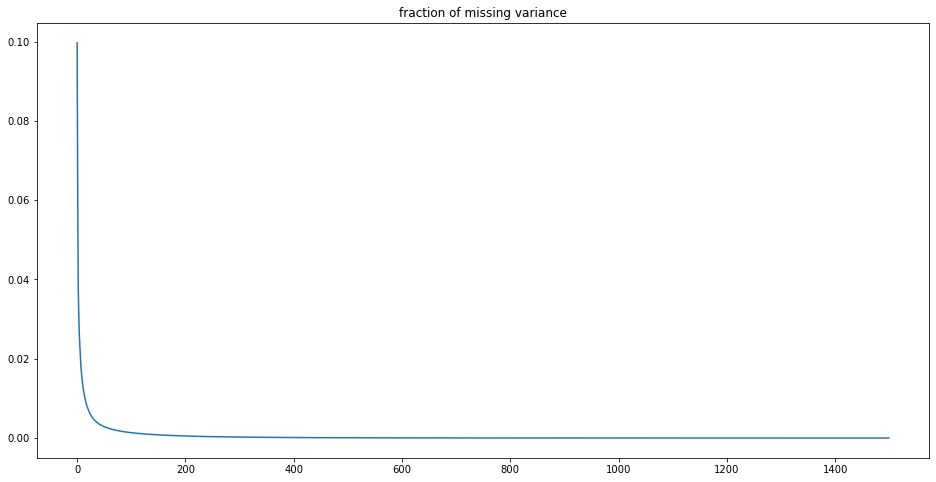

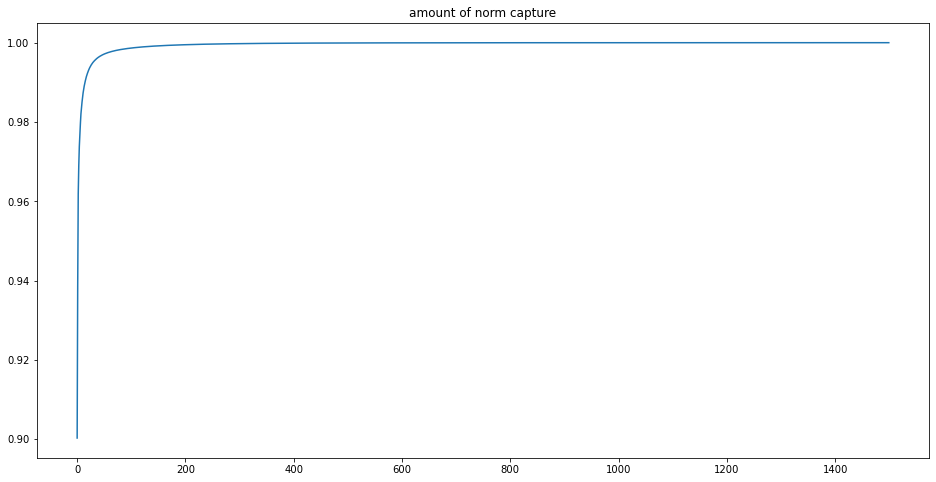

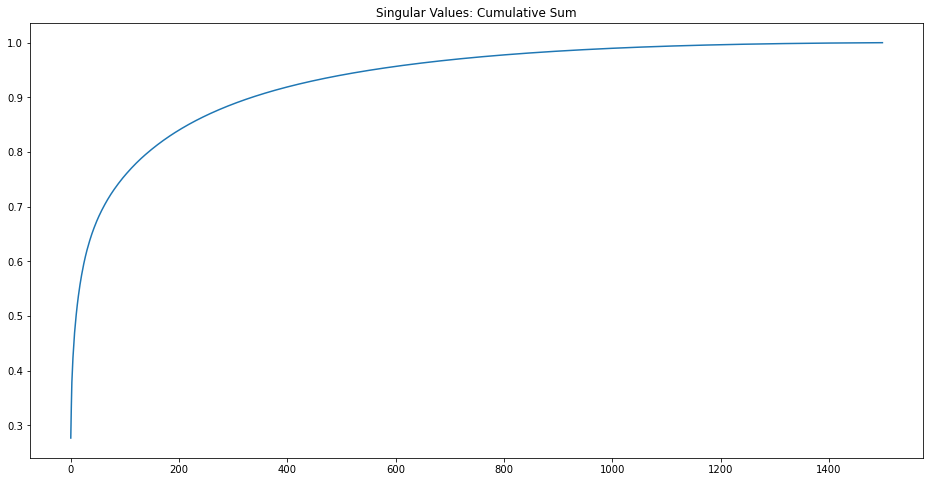

In [3]:
square_relative_err = np.square(relative_error)
sum_sing = np.cumsum(np.diag(S))/np.sum(np.diag(S))

plt.figure(1)
plt.plot(square_relative_err)
plt.title('fraction of missing variance')
plt.show()

plt.figure(2)
plt.plot(1-square_relative_err)
plt.title('amount of norm capture')
plt.show()

plt.figure(3)
plt.plot(sum_sing)
plt.title('Singular Values: Cumulative Sum')
plt.show()

In [4]:
rank_sumsingvalue = np.where(np.logical_and(sum_sing >= 0.989, sum_sing <=0.99))
a = rank_sumsingvalue[0]
print("rank_99%ofthecumulativesum", a[0])
rank_norm = np.where(np.logical_and((1-square_relative_err) >= 0.989, (1-square_relative_err) <=0.99))
b = rank_norm[0]
print("rank_99%ofthenorm", b[0])

rank_99%ofthecumulativesum 984
rank_99%ofthenorm 13
